In [1]:
import osmnx as ox, matplotlib.pyplot as plt, numpy as np
import matplotlib.patches as patches
ox.config(use_cache=True, log_console=True)
%matplotlib inline
pedestrian = '["area"!~"yes"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["service"!~"private"]["access"!~"private"]'

In [31]:
def intersection_tuning(address):
  # print(address)
  G = ox.graph_from_address(address, custom_filter= pedestrian, distance=750)
  G_proj = ox.project_graph(G)
  g_proj_gdfs = ox.graph_to_gdfs(G_proj, nodes=False, edges=True, fill_edge_geometry=True)
  #itereate over cleaning buffer distance
  buffers = [15,12,10,8,5]
  # instantiate plot
  fig, axarr = plt.subplots(ncols=5, sharex='col', sharey='row', squeeze=False, figsize=(18,4.5), dpi=80)
  for i in range(len(buffers)):
    # clean up the intersections and extract their xy coords
    intersections = ox.clean_intersections(G_proj, tolerance=buffers[i], dead_ends=False)
    points = np.array([point.xy for point in intersections])
    # plot the cleaned-up intersections
    g_proj_gdfs.plot(ax = axarr[0][i])
    axarr[0][i].scatter(x=points[:,0], y=points[:,1], s = 10, zorder=2, color=None, edgecolors='#000000')
    axarr[0][i].set_title("Tolerance: {}".format(buffers[i]))
    axarr[0][i].set_aspect(1)
    axarr[0][i].set_axis_off()
    # axarr[0][i].add_patch(patches.Rectangle((0.8, 0.8), 0.2, 0.2))
  plt.suptitle(address, fontsize=14, fontweight='bold')    
  plt.tight_layout()
  plt.show()

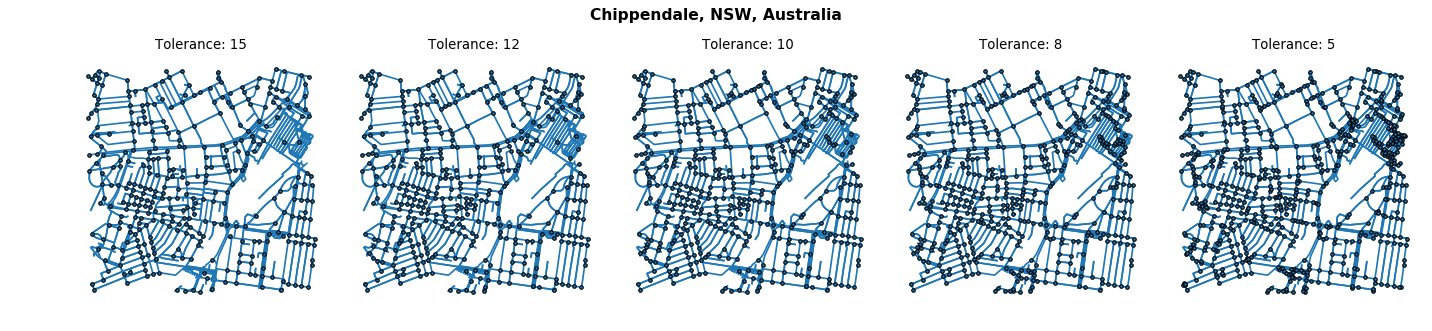

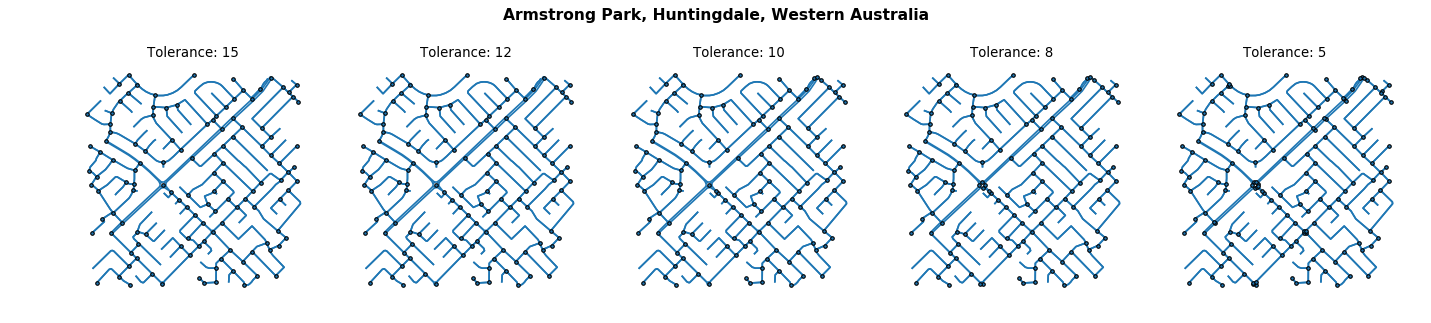

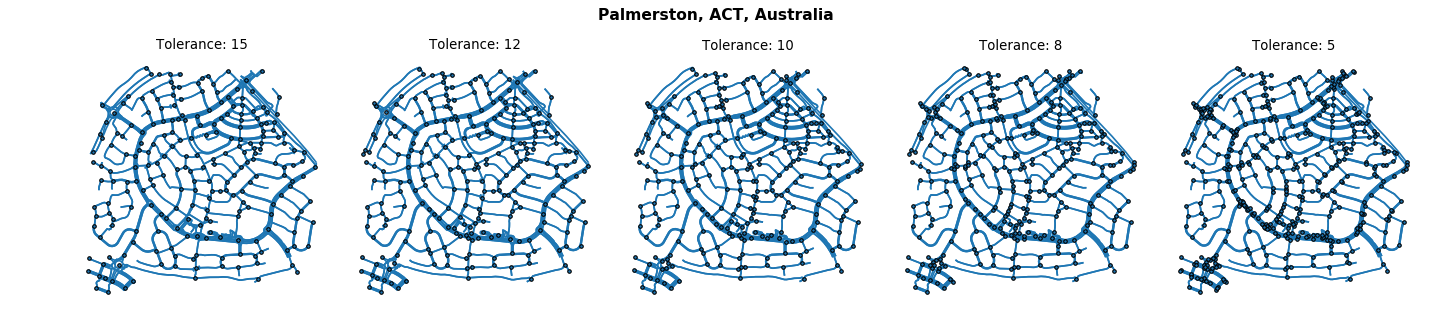

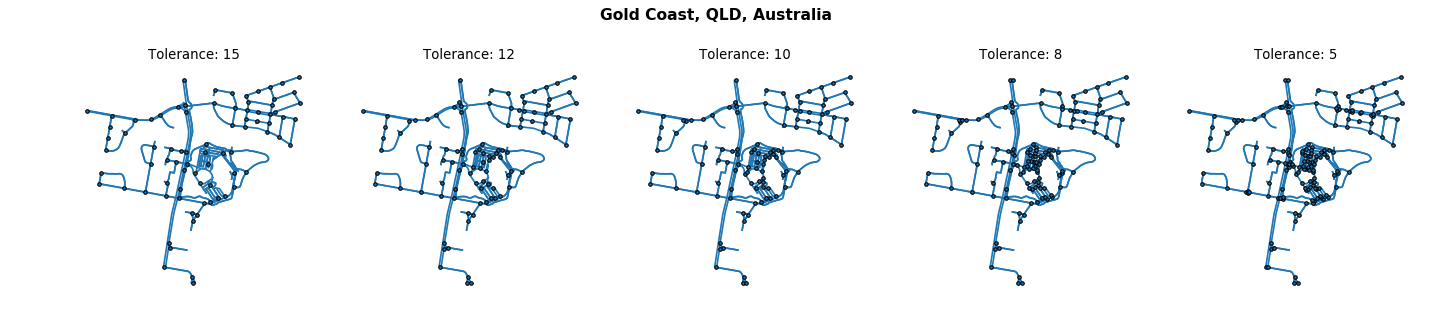

In [32]:
for address in [
                'Chippendale, NSW, Australia',
                'Armstrong Park, Huntingdale, Western Australia',
                'Palmerston, ACT, Australia',
                'Gold Coast, QLD, Australia'
               ]:
  intersection_tuning(address)

idea: Could be interesting to overlay modified tolerances with some kind of image difference overlay relative to original (e.g. colourize where nodes have been added or subtracted)